# Trending: An Analysis of Youtube's Viral Video Algorihthm
### James Hazzard, Mohammed Musah, & Jacob Wise Dennis
#### 06|30|2019


Definition: 
"Trending" Content: A video on Youtube that is hosted the websites front page as a featured video, providing maximum exposure to users. 

Introduction:
Our project analyses a panel dataset concerning all videos that were "Trending" on the Youtube platform from the year 2017 to 2018. It includes all relevant statistics on each video, including video likes, dislikes, and the number of total comments aggregated on the video at the time the observations of created. Additionally, the dataset includes variables for the category of video as classified by the Youtube directory system as well as timestamp data for the video being uploaded. 

Our Project:
This exploratory project aims to look at the effects of Youtube's "Trending" algorihthm. Given that it is proprietary, we aim to analyze what kind of content is selected to be "Trending". By the company's own admission, the algoritm takes many factors into consideration including but not limited to view count, days to trend, age of the video. Along with measuring correlations by dimensions of engagement, we also aim to see what, if any, differences in performance there are between video cateogories. 

Outline
1.) Cleaning Methods
2.) Summary Statistics and Graphs
3.) Analysis and Regressions
4.) Predictions

## 1.) Cleaning Methods

In [4]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline


In [5]:
Full_File = pd.read_csv('C:\\Users\\jwd286\\Desktop\\NYU Coursework\\Data Bootcamp\\USvideos.csv')

In [6]:
Full_File.shape

(40949, 16)

In [7]:
Full_File.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [8]:
Full_File

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


###  Drop unnecessary column

In [9]:
Full_File.drop('thumbnail_link',axis=1,inplace=True)

### Drop files that don't have comments/ratings/removed

In [10]:
Full_File = Full_File.drop(Full_File[Full_File['comments_disabled']==True].index)


In [11]:
Full_File = Full_File.drop(Full_File[Full_File['ratings_disabled']==True].index)

In [12]:
Full_File = Full_File.drop(Full_File[Full_File['video_error_or_removed']==True].index)

In [13]:
Full_File.drop(['comments_disabled','ratings_disabled','video_error_or_removed'],axis=1,inplace=True)

### Apply category labels

In [14]:
Full_File=Full_File.set_index('title')

In [15]:
Keys = {1: 'Film & Animation', 
        2: 'Autos & Vehicles', 
        10: 'Music', 
        15: 'Pets & Animals', 
        17: 'Sports', 
        18: 'Short Movies', 
        19: 'Travel & Events', 
        20: 'Gaming', 
        21: 'Videoblogging', 
        22: 'People & Blogs', 
        23: 'Comedy', 
        24: 'Entertainment', 
        25: 'News & Politics', 
        26: 'Howto & Style', 
        27: 'Education', 
        28: 'Science & Technology', 
        29: 'Nonprofits & Activism', 
        30: 'Movies', 31: 'Anime/Animation', 
        32: 'Action/Adventure', 33: 'Classics', 
        34: 'Comedy', 
        35: 'Documentary', 
        36: 'Drama', 
        37: 'Family', 
        38: 'Foreign', 
        39: 'Horror', 
        40: 'Sci-Fi/Fantasy', 
        41: 'Thriller', 
        42: 'Shorts', 
        43: 'Shows', 
        44: 'Trailers'}

In [16]:
Full_File['category_id']=Full_File['category_id'].apply(Keys.get)

### Apply dates

In [17]:
Full_File['trending_date'] = pd.to_datetime(Full_File['trending_date'], format='%y.%d.%m')

In [18]:
TimeTemp = Full_File['publish_time'].str.split("T",expand=True)

In [19]:
Full_File['publish_date']=TimeTemp[0]

In [20]:
Full_File['publish_time']=TimeTemp[1]

In [21]:
Full_File['publish_date'] = pd.to_datetime(Full_File['publish_date'], format='%Y-%m-%d')

In [22]:
hour = pd.DataFrame(Full_File['publish_time'].str[:2].astype(int))

### creating to variable for time of day video was publised

In [23]:
Full_File['publish_time_of_day']= np.where(hour['publish_time']<17,'day','evening')

### Create new variable, "Days to Trend"

In [24]:
Full_File['days_to_trend']=Full_File['trending_date']-Full_File['publish_date']

In [25]:
Full_File['days_to_trend']=Full_File['days_to_trend'].dt.days

In [26]:
Full_File

,video_id,trending_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_date,publish_time_of_day,days_to_trend
title,,,,,,,,,,,,,,
WE WANT TO TALK ABOUT OUR MARRIAGE,2kyS6SvSYSE,2017-11-14,CaseyNeistat,People & Blogs,17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,evening,1
The Trump Presidency: Last Week Tonight with John Oliver (HBO),1ZAPwfrtAFY,2017-11-14,LastWeekTonight,Entertainment,07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,"One year after the presidential election, John...",2017-11-13,day,1
"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",5qpjK5DgCt4,2017-11-14,Rudy Mancuso,Comedy,19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,evening,2
Nickelback Lyrics: Real or Fake?,puqaWrEC7tY,2017-11-14,Good Mythical Morning,Entertainment,11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,Today we find out if Link is a Nickelback amat...,2017-11-13,day,1
I Dare You: GOING BALD!?,d380meD0W0M,2017-11-14,nigahiga,Entertainment,18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,I know it's been a while since we did this sho...,2017-11-12,evening,2
2 Weeks with iPhone X,gHZ1Qz0KiKM,2017-11-14,iJustine,Science & Technology,19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,Using the iPhone for the past two weeks -- her...,2017-11-13,evening,1
Roy Moore & Jeff Sessions Cold Open - SNL,39idVpFF7NQ,2017-11-14,Saturday Night Live,Entertainment,05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,Embattled Alabama Senate candidate Roy Moore (...,2017-11-12,day,2
5 Ice Cream Gadgets put to the Test,nc99ccSXST0,2017-11-14,CrazyRussianHacker,Science & Technology,21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,Ice Cream Pint Combination Lock - http://amzn....,2017-11-12,evening,2
The Greatest Showman | Official Trailer 2 [HD] | 20th Century FOX,jr9QtXwC9vc,2017-11-14,20th Century Fox,Film & Animation,14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,"Inspired by the imagination of P.T. Barnum, Th...",2017-11-13,day,1


### Drop videos that took a long time to trend as outliers

In [27]:
Full_File = Full_File.drop(Full_File[Full_File['days_to_trend']>30].index)

### Create variables for the day of the week that video was published and trends

In [28]:
Full_File['trend_date_day']=Full_File['trending_date'].dt.day_name()

C:\Users\jwd286\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
Full_File['publish_date_day']=Full_File['publish_date'].dt.day_name()

C:\Users\jwd286\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
Full_File['engaged']=Full_File['comment_count']+Full_File['likes']+Full_File['dislikes']
Full_File['engagement']=(Full_File['engaged']/Full_File['views'])
Full_File['like ratio']=(Full_File['likes']/Full_File['views'])
# Full_File['like_ration']=Full_File['like ratio'].replace(np.inf,0)

C:\Users\jwd286\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jwd286\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jwd286\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [31]:
Full_File

,video_id,trending_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_date,publish_time_of_day,days_to_trend,trend_date_day,publish_date_day,engaged,engagement,like ratio
title,,,,,,,,,,,,,,,,,,,
WE WANT TO TALK ABOUT OUR MARRIAGE,2kyS6SvSYSE,2017-11-14,CaseyNeistat,People & Blogs,17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,evening,1,Tuesday,Monday,76447,0.102151,0.076869
The Trump Presidency: Last Week Tonight with John Oliver (HBO),1ZAPwfrtAFY,2017-11-14,LastWeekTonight,Entertainment,07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,"One year after the presidential election, John...",2017-11-13,day,1,Tuesday,Monday,116034,0.047972,0.040179
"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",5qpjK5DgCt4,2017-11-14,Rudy Mancuso,Comedy,19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,evening,2,Tuesday,Sunday,159553,0.049994,0.045758
Nickelback Lyrics: Real or Fake?,puqaWrEC7tY,2017-11-14,Good Mythical Morning,Entertainment,11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,Today we find out if Link is a Nickelback amat...,2017-11-13,day,1,Tuesday,Monday,12984,0.037836,0.029641
I Dare You: GOING BALD!?,d380meD0W0M,2017-11-14,nigahiga,Entertainment,18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,I know it's been a while since we did this sho...,2017-11-12,evening,2,Tuesday,Sunday,151742,0.072405,0.063097
2 Weeks with iPhone X,gHZ1Qz0KiKM,2017-11-14,iJustine,Science & Technology,19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,Using the iPhone for the past two weeks -- her...,2017-11-13,evening,1,Tuesday,Monday,11708,0.098238,0.081918
Roy Moore & Jeff Sessions Cold Open - SNL,39idVpFF7NQ,2017-11-14,Saturday Night Live,Entertainment,05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,Embattled Alabama Senate candidate Roy Moore (...,2017-11-12,day,2,Tuesday,Sunday,20408,0.009702,0.007603
5 Ice Cream Gadgets put to the Test,nc99ccSXST0,2017-11-14,CrazyRussianHacker,Science & Technology,21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,Ice Cream Pint Combination Lock - http://amzn....,2017-11-12,evening,2,Tuesday,Sunday,27873,0.034086,0.028937
The Greatest Showman | Official Trailer 2 [HD] | 20th Century FOX,jr9QtXwC9vc,2017-11-14,20th Century Fox,Film & Animation,14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,"Inspired by the imagination of P.T. Barnum, Th...",2017-11-13,day,1,Tuesday,Monday,4002,0.004845,0.004289


### Remove videos that trend for more than one day

In [32]:
Full_File = Full_File.sort_values('publish_time',ascending=False).drop_duplicates(subset='video_id') 

In [33]:
len(Full_File['video_id'])

6132

In [34]:
Full_File['video_id'].nunique()

6132

### Creating a unique ID

In [35]:
Full_File['unique_id'] = Full_File['video_id'] + Full_File['trending_date'].astype(str)

### Selecting variables with significance to analysis

In [36]:
Data = Full_File[[ 'category_id','channel_title',
       'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'description', 'publish_time_of_day',
       'trend_date_day', 'publish_date_day', 'engaged', 'engagement',
       'like ratio', 'unique_id','days_to_trend']]
Data

,category_id,channel_title,tags,views,likes,dislikes,comment_count,description,publish_time_of_day,trend_date_day,publish_date_day,engaged,engagement,like ratio,unique_id,days_to_trend
title,,,,,,,,,,,,,,,,
WE TRIED TO MAKE TASTY'S GIANT MACARON (VERSUS),Entertainment,HellthyJunkFood,"giant macaron|""macaroon""|""how to make macaroon...",224124,7770,275,1260,SUBSCRIBE HERE ➡️ https://goo.gl/CitGia2ND CHA...,evening,Thursday,Wednesday,9305,0.041517,0.034668,zNZJNlx4P802018-05-31,1
Sephora Beauty Haul,Howto & Style,Nicole Guerriero,"nicole guerriero|""sephora haul 2018""|""high end...",341243,14799,618,1612,Crystal Giveaway Winners: (all have responded)...,evening,Saturday,Sunday,17029,0.049903,0.043368,GpbMbBNP-NI2018-03-31,13
Harry Styles canta Sign Of The Times a X Factor Italia - Live Show 3,Entertainment,X Factor Italia,"X Factor|""X Factor Italia""|""X Factor Italy""|""X...",199429,10175,66,539,Super ospite del terzo Live Show di #XF11 Harr...,evening,Tuesday,Thursday,10780,0.054054,0.051021,_CJN_ryETIY2017-11-14,5
Justice League Will Fail To Hit $700 Million At Box Office - Box Office Report,Entertainment,John Campea,"Justice League|""Movie""|""Batman""|""Box Office""|""...",62122,1943,196,2208,Justice League takes another 60% drop despite ...,evening,Tuesday,Sunday,4347,0.069975,0.031277,76-ui4F8DJ02017-12-05,2
"2018 Golden Globes: Who Should Win, Who Will Win | THR",Entertainment,The Hollywood Reporter,"thr|""the hollywood reporter""|""hollywood report...",24047,264,20,125,"Subscribe for Roundtables, Box Office Reports,...",evening,Monday,Friday,409,0.017008,0.010979,WIkBvAmXyGU2018-01-08,3
Jenga Wizard - 980027,Comedy,RM Videos,"Viral|""Video""|""Epic""",109733,189,30,21,Jukin Media Verified (Original) * For licensin...,evening,Saturday,Wednesday,240,0.002187,0.001722,bOzOMmHlQ3o2017-12-30,10
"Watch Tesla's Secret Santa Mode! Easter Egg with Icy Roads, Reindeer, Jingle Bells and More",Autos & Vehicles,DragTimes,"tesla|""model s""|""model x""|""easter egg""|""tesla ...",157434,1137,269,248,The HIDDEN Easter Egg inside this is revealed ...,evening,Thursday,Saturday,1654,0.010506,0.007222,JnepCulEQOo2017-12-28,5
Physical Encoder for an Open Source Braille Embosser,People & Blogs,Carlos Campos,"Open Source|""Braille Embosser""|""Braille Printe...",3746,2,0,0,This a 3D printed encoder physical encoder. In...,evening,Sunday,Thursday,2,0.000534,0.000534,qmcVlPqy9-o2018-01-07,10
Updated Everyday Makeup Routine 💋,People & Blogs,Daisy Marquez,"Daisy Marquez|""DaisyMarquez""|""Daisy Marques""|""...",458231,22063,1158,2021,In this video I filmed my updated Makeup Routi...,evening,Friday,Sunday,25242,0.055086,0.048148,NIf8LjND67Y2018-04-20,12


## Summary Statistics and Graphs

In [60]:
Trend_analysis =Full_File.sort_values(['like ratio', 'views'], ascending=False)[['category_id','like ratio','views','publish_date','trending_date','publish_time_of_day','days_to_trend','publish_date_day','trend_date_day']]

In [61]:
Trend_analysis.loc[Trend_analysis['category_id']=='Howto & Style'].sort_values(['views','days_to_trend'],ascending=False)

,category_id,like ratio,views,publish_date,trending_date,publish_time_of_day,days_to_trend,publish_date_day,trend_date_day
title,,,,,,,,,
42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE,Howto & Style,0.007298,35696409,2017-12-03,2017-12-09,day,6,Sunday,Saturday
I Got 99 Problems But Being A Girl Ain't One! DIY Girls Hacks and More by Blossom,Howto & Style,0.006026,15598360,2018-04-21,2018-05-02,day,11,Saturday,Wednesday
John Lewis Christmas Ad 2017 - #MozTheMonster,Howto & Style,0.007515,8041928,2017-11-10,2017-11-17,day,7,Friday,Friday
Blind Girl Describes My Face to a Police Sketch Artist!,Howto & Style,0.044877,7828415,2018-05-30,2018-06-10,evening,11,Wednesday,Sunday
50 TOTALLY CRAZY IDEAS YOU CAN ACTUALLY DIY,Howto & Style,0.007401,5505292,2017-12-16,2017-12-21,day,5,Saturday,Thursday
How To Make a Vegan Curry,Howto & Style,0.055949,5090064,2018-04-01,2018-04-06,evening,5,Sunday,Friday
I Went To Japan To Make The Most Difficult Omelet,Howto & Style,0.035902,5065000,2018-06-02,2018-06-07,day,5,Saturday,Thursday
9 Weird Things To Do When You Are Bored,Howto & Style,0.009294,4911266,2018-01-07,2018-01-12,day,5,Sunday,Friday
17 Weird Ways To Survive School / Back To School Life Hacks,Howto & Style,0.008360,4907380,2017-12-26,2017-12-30,evening,4,Tuesday,Saturday


In [62]:
##Summary Means by Category
Full_File['log_likes']= np.log(Full_File.likes)
Full_File['log_dislikes']= np.log(Full_File.dislikes)
Full_File['log_views']= np.log(Full_File.views)
Full_File['log_comments']= np.log(Full_File.comment_count)

df_stat = Full_File.groupby('category_id', as_index = False)['days_to_trend', 'log_views','log_likes', 'log_comments'].mean()
df_stat
# Trend_analysis.groupby('category_id', as_index = False)['like ratio'].mean().sort_values('like ratio', ascending=False)

C:\Users\jwd286\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\jwd286\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jwd286\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


,category_id,days_to_trend,log_views,log_likes,log_comments
0,Autos & Vehicles,5.142857,12.576509,7.920820,6.066889
1,Comedy,4.744444,13.237130,9.768713,-inf
2,Education,5.087500,12.677303,9.256919,7.111181
3,Entertainment,4.831841,12.950236,9.014349,-inf
4,Film & Animation,5.832215,13.202214,9.224846,7.111841
5,Gaming,5.323232,13.514262,10.048183,8.238125
6,Howto & Style,5.355442,12.635104,9.396692,-inf
7,Music,5.687898,13.486388,10.301785,-inf
8,News & Politics,3.974414,11.670351,6.982570,-inf
9,Nonprofits & Activism,5.230769,11.293182,7.488438,5.610427


In [37]:
plt.style.use('classic')

Text(0, 0.5, 'Categories')

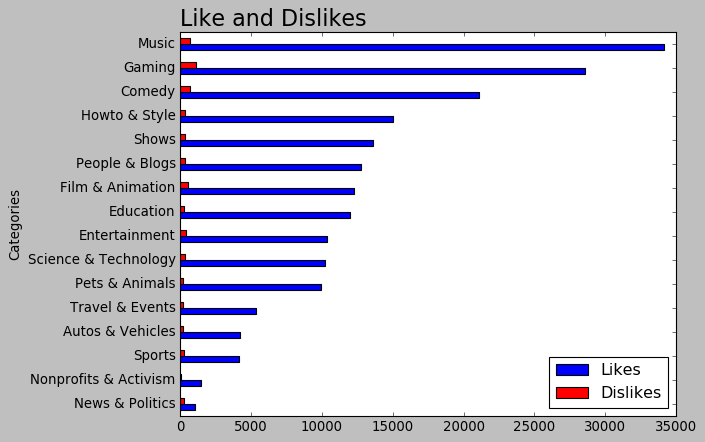

In [38]:

fig,ax = plt.subplots()
Full_File[['category_id','likes','dislikes']].groupby('category_id').median().sort_values('likes').plot.barh(ax=ax,color=['b','r'])
ax.set_title('Like and Dislikes', loc='left',size=20)
ax.legend(['Likes','Dislikes'],loc=4)
ax.set_ylabel('Categories')

#### Here, we see a category-wise breakdown of the ratio from likes to dislikes. The disparity between the likes and dislikes in each is not surprising; however, we note that music and gaming had the higest disparites. 

Text(0, 0.5, 'Categories')

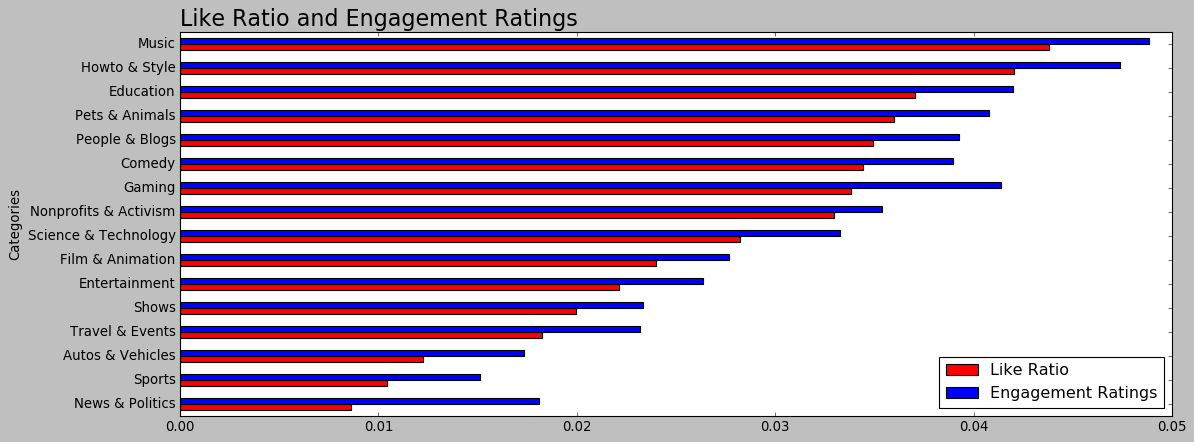

In [39]:
fig,ax = plt.subplots()
Full_File[['category_id','like ratio','engagement']].groupby('category_id').median().sort_values('like ratio').plot.barh(ax=ax,figsize=(16,6),color=['r','b'])
ax.set_title('Like Ratio and Engagement Ratings', loc='left',size=20)
ax.legend(['Like Ratio','Engagement Ratings'],loc=4)
ax.set_ylabel('Categories')

#### Here, 'Like Ratio' is defined as the ratio between a video's likes and it's views. 'Engagement' is the ratio between total video interaction (likes, dislikes, and comments) to views. This horizontal bar chart is essentially showing the share of explicitly positive engagement (likes) compared to the overall share of engagement. 

## Ranked channel_title by grouping

In [40]:
Data['channel_title_rank'] = Data['channel_title'].rank(method='dense')
Data['publish_time_of_day_rank'] = Data['publish_time_of_day'].rank(method='dense')
Data['publish_day_rank'] = Data['publish_date_day'].rank(method='dense')
Data

C:\Users\jwd286\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jwd286\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jwd286\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

,category_id,channel_title,tags,views,likes,dislikes,comment_count,description,publish_time_of_day,trend_date_day,publish_date_day,engaged,engagement,like ratio,unique_id,days_to_trend,channel_title_rank,publish_time_of_day_rank,publish_day_rank
title,,,,,,,,,,,,,,,,,,,
WE TRIED TO MAKE TASTY'S GIANT MACARON (VERSUS),Entertainment,HellthyJunkFood,"giant macaron|""macaroon""|""how to make macaroon...",224124,7770,275,1260,SUBSCRIBE HERE ➡️ https://goo.gl/CitGia2ND CHA...,evening,Thursday,Wednesday,9305,0.041517,0.034668,zNZJNlx4P802018-05-31,1,709.0,2.0,7.0
Sephora Beauty Haul,Howto & Style,Nicole Guerriero,"nicole guerriero|""sephora haul 2018""|""high end...",341243,14799,618,1612,Crystal Giveaway Winners: (all have responded)...,evening,Saturday,Sunday,17029,0.049903,0.043368,GpbMbBNP-NI2018-03-31,13,1210.0,2.0,4.0
Harry Styles canta Sign Of The Times a X Factor Italia - Live Show 3,Entertainment,X Factor Italia,"X Factor|""X Factor Italia""|""X Factor Italy""|""X...",199429,10175,66,539,Super ospite del terzo Live Show di #XF11 Harr...,evening,Tuesday,Thursday,10780,0.054054,0.051021,_CJN_ryETIY2017-11-14,5,1856.0,2.0,5.0
Justice League Will Fail To Hit $700 Million At Box Office - Box Office Report,Entertainment,John Campea,"Justice League|""Movie""|""Batman""|""Box Office""|""...",62122,1943,196,2208,Justice League takes another 60% drop despite ...,evening,Tuesday,Sunday,4347,0.069975,0.031277,76-ui4F8DJ02017-12-05,2,837.0,2.0,4.0
"2018 Golden Globes: Who Should Win, Who Will Win | THR",Entertainment,The Hollywood Reporter,"thr|""the hollywood reporter""|""hollywood report...",24047,264,20,125,"Subscribe for Roundtables, Box Office Reports,...",evening,Monday,Friday,409,0.017008,0.010979,WIkBvAmXyGU2018-01-08,3,1623.0,2.0,1.0
Jenga Wizard - 980027,Comedy,RM Videos,"Viral|""Video""|""Epic""",109733,189,30,21,Jukin Media Verified (Original) * For licensin...,evening,Saturday,Wednesday,240,0.002187,0.001722,bOzOMmHlQ3o2017-12-30,10,1336.0,2.0,7.0
"Watch Tesla's Secret Santa Mode! Easter Egg with Icy Roads, Reindeer, Jingle Bells and More",Autos & Vehicles,DragTimes,"tesla|""model s""|""model x""|""easter egg""|""tesla ...",157434,1137,269,248,The HIDDEN Easter Egg inside this is revealed ...,evening,Thursday,Saturday,1654,0.010506,0.007222,JnepCulEQOo2017-12-28,5,497.0,2.0,3.0
Physical Encoder for an Open Source Braille Embosser,People & Blogs,Carlos Campos,"Open Source|""Braille Embosser""|""Braille Printe...",3746,2,0,0,This a 3D printed encoder physical encoder. In...,evening,Sunday,Thursday,2,0.000534,0.000534,qmcVlPqy9-o2018-01-07,10,307.0,2.0,5.0
Updated Everyday Makeup Routine 💋,People & Blogs,Daisy Marquez,"Daisy Marquez|""DaisyMarquez""|""Daisy Marques""|""...",458231,22063,1158,2021,In this video I filmed my updated Makeup Routi...,evening,Friday,Sunday,25242,0.055086,0.048148,NIf8LjND67Y2018-04-20,12,429.0,2.0,4.0


In [41]:
Full_File.groupby('category_id', as_index = False)['days_to_trend'].mean()

,category_id,days_to_trend
0,Autos & Vehicles,5.142857
1,Comedy,4.744444
2,Education,5.087500
3,Entertainment,4.831841
4,Film & Animation,5.832215
5,Gaming,5.323232
6,Howto & Style,5.355442
7,Music,5.687898
8,News & Politics,3.974414
9,Nonprofits & Activism,5.230769


## plotting variables to determine significance

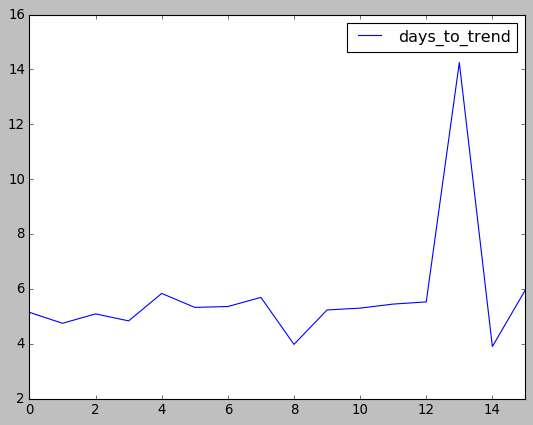

In [42]:
Full_File.groupby('category_id', as_index = False)['days_to_trend'].mean().plot()

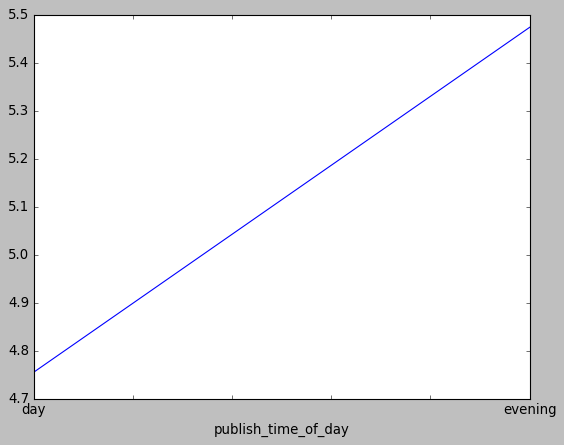

In [43]:
Full_File.groupby('publish_time_of_day', as_index = True)['days_to_trend'].mean().plot()

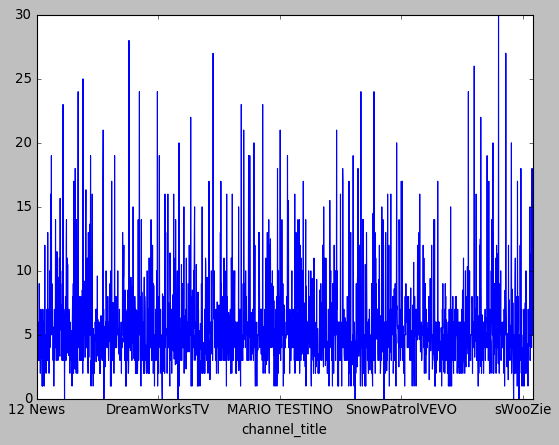

In [44]:
Full_File.groupby('channel_title', as_index = True)['days_to_trend'].mean().plot()

#### Based on the above three charts, we dermined that channel_title & category ID were more significant in determining the likelihood a video would trend. 

In [47]:
Data

,category_id,channel_title,tags,views,likes,dislikes,comment_count,description,publish_time_of_day,trend_date_day,...,Gaming,Film & Animation,Sports,Music,Science & Technology,News & Politics,Pets & Animals,Education,Shows,Nonprofits & Activism
title,,,,,,,,,,,,,,,,,,,,,
WE TRIED TO MAKE TASTY'S GIANT MACARON (VERSUS),Entertainment,HellthyJunkFood,"giant macaron|""macaroon""|""how to make macaroon...",224124,7770,275,1260,SUBSCRIBE HERE ➡️ https://goo.gl/CitGia2ND CHA...,evening,Thursday,...,0,0,0,0,0,0,0,0,0,0
Sephora Beauty Haul,Howto & Style,Nicole Guerriero,"nicole guerriero|""sephora haul 2018""|""high end...",341243,14799,618,1612,Crystal Giveaway Winners: (all have responded)...,evening,Saturday,...,0,0,0,0,0,0,0,0,0,0
Harry Styles canta Sign Of The Times a X Factor Italia - Live Show 3,Entertainment,X Factor Italia,"X Factor|""X Factor Italia""|""X Factor Italy""|""X...",199429,10175,66,539,Super ospite del terzo Live Show di #XF11 Harr...,evening,Tuesday,...,0,0,0,0,0,0,0,0,0,0
Justice League Will Fail To Hit $700 Million At Box Office - Box Office Report,Entertainment,John Campea,"Justice League|""Movie""|""Batman""|""Box Office""|""...",62122,1943,196,2208,Justice League takes another 60% drop despite ...,evening,Tuesday,...,0,0,0,0,0,0,0,0,0,0
"2018 Golden Globes: Who Should Win, Who Will Win | THR",Entertainment,The Hollywood Reporter,"thr|""the hollywood reporter""|""hollywood report...",24047,264,20,125,"Subscribe for Roundtables, Box Office Reports,...",evening,Monday,...,0,0,0,0,0,0,0,0,0,0
Jenga Wizard - 980027,Comedy,RM Videos,"Viral|""Video""|""Epic""",109733,189,30,21,Jukin Media Verified (Original) * For licensin...,evening,Saturday,...,0,0,0,0,0,0,0,0,0,0
"Watch Tesla's Secret Santa Mode! Easter Egg with Icy Roads, Reindeer, Jingle Bells and More",Autos & Vehicles,DragTimes,"tesla|""model s""|""model x""|""easter egg""|""tesla ...",157434,1137,269,248,The HIDDEN Easter Egg inside this is revealed ...,evening,Thursday,...,0,0,0,0,0,0,0,0,0,0
Physical Encoder for an Open Source Braille Embosser,People & Blogs,Carlos Campos,"Open Source|""Braille Embosser""|""Braille Printe...",3746,2,0,0,This a 3D printed encoder physical encoder. In...,evening,Sunday,...,0,0,0,0,0,0,0,0,0,0
Updated Everyday Makeup Routine 💋,People & Blogs,Daisy Marquez,"Daisy Marquez|""DaisyMarquez""|""Daisy Marques""|""...",458231,22063,1158,2021,In this video I filmed my updated Makeup Routi...,evening,Friday,...,0,0,0,0,0,0,0,0,0,0


## 3.) Analysis and Regressions

In [63]:
Trend_analysis.groupby('category_id', as_index = False)['like ratio'].mean().sort_values('like ratio', ascending=False)

,category_id,like ratio
7,Music,0.052119
6,Howto & Style,0.044432
1,Comedy,0.041712
10,People & Blogs,0.041201
2,Education,0.037607
11,Pets & Animals,0.037591
5,Gaming,0.037140
9,Nonprofits & Activism,0.034896
12,Science & Technology,0.032616
4,Film & Animation,0.028945


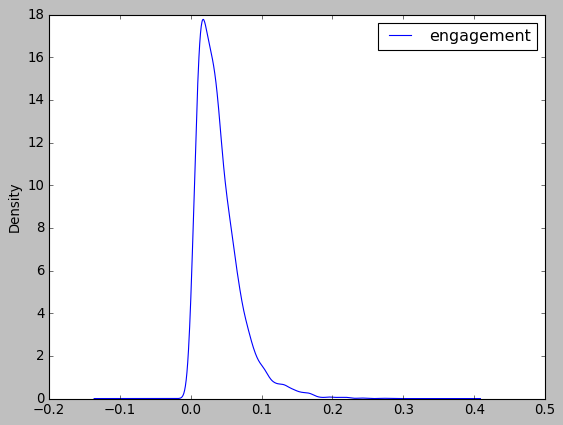

In [64]:
##Density plot of Days to Trend by engagement 
density_1 = Full_File.plot.kde(x='days_to_trend',
                          y='engagement')

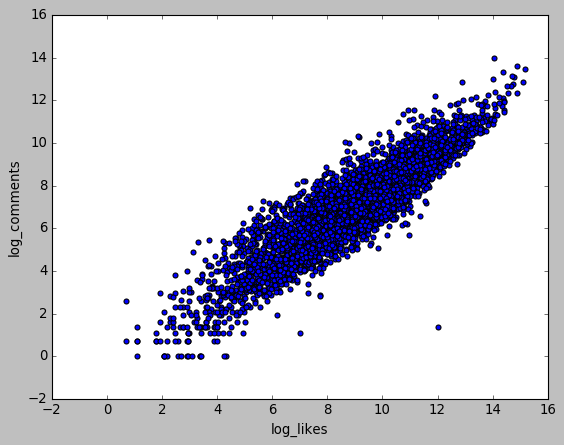

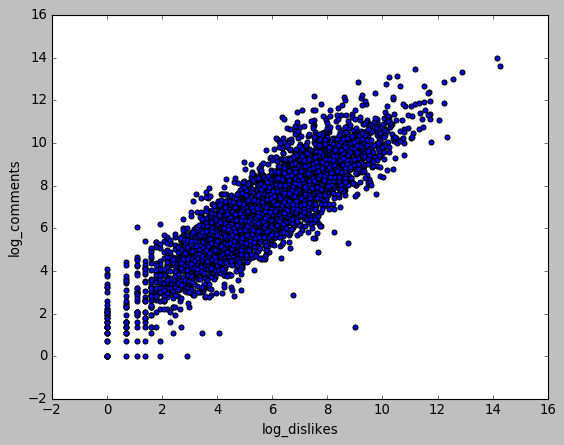

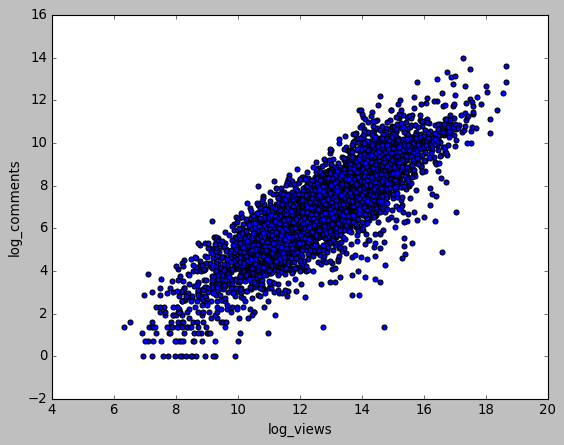

In [65]:
ax2 = Full_File.plot.scatter(x='log_likes',
                          y='log_comments')
ax3 = Full_File.plot.scatter(x='log_dislikes', y='log_comments')
ax4 = Full_File.plot.scatter(x='log_views', y='log_comments')

#### The very linear relationships between likes, dislikes, views, and comment counts are as predicted, given the nature of what "Trending" is. However, we turn to regressions to see what dimmensions are statistically significant. 

### Regressions 

In [66]:
#Basic regressions  
## Regressing Views on categories 
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
reg = smf.ols('views ~ likes+C(category_id)', data=Full_File).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     740.9
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:01:07   Log-Likelihood:                -99813.
No. Observations:                6132   AIC:                         1.997e+05
Df Residuals:                    6115   BIC:                         1.998e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [67]:
# regression of time of day onto views
nom_reg = smf.mnlogit('publish_time_of_day ~ likes+comment_count', data=Full_File).fit()
print(nom_reg.summary())

Optimization terminated successfully.
         Current function value: 0.663331
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 6132
Model:                        MNLogit   Df Residuals:                     6129
Method:                           MLE   Df Model:                            2
Date:                Wed, 10 Jul 2019   Pseudo R-squ.:                0.001921
Time:                        23:01:07   Log-Likelihood:                -4067.5
converged:                       True   LL-Null:                       -4075.4
                                        LLR p-value:                 0.0003979
y=publish_time_of_day[evening]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.4645      0.028    -16.815     

In [68]:
# Regressing days to trend with engagement

reg2 = smf.ols('days_to_trend ~ engagement', data=Full_File).fit()
print(reg2.summary())


                            OLS Regression Results                            
Dep. Variable:          days_to_trend   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     47.90
Date:                Wed, 10 Jul 2019   Prob (F-statistic):           4.95e-12
Time:                        23:01:07   Log-Likelihood:                -17058.
No. Observations:                6132   AIC:                         3.412e+04
Df Residuals:                    6130   BIC:                         3.413e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4767      0.082     67.064      0.0

In [69]:
## Nominal Regression of Cateogories by the Days to Trend

nom_reg2 = smf.mnlogit('category_id ~ days_to_trend', data=Full_File).fit()
nom_reg2.summary()

Optimization terminated successfully.
         Current function value: 2.321553
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 6132
Model:                        MNLogit   Df Residuals:                     6102
Method:                           MLE   Df Model:                           15
Date:                Wed, 10 Jul 2019   Pseudo R-squ.:                0.005430
Time:                        23:01:27   Log-Likelihood:                -14236.
converged:                       True   LL-Null:                       -14313.
                                        LLR p-value:                 1.994e-25
==================================================================================================
               y=category_id[Comedy]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                2.2893      0.219     10.445      0.000       1.860       2.719
days_to_trend                           -0.0285      0.034     -0.835      0.404      -0.096       0.038
--------------------------------------------------------------------------------------------------------
y=category_id[Education]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.3560      0.233      5.827      0.000       0.900       1.812
days_to_trend               -0.0036      0.036     -0.100      0.920      -0.074       0.067
--------------------------------------------------------------------------------------------
y=category_id[Entertainment]       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.3201      0.211     15.717      0.000       2.906       3.734
days_to_trend                   -0.0217      0.033     -0.665      0.506      -0.086       0.042
------------------------------------------------------------------------------------------------
y=category_id[Film & Animation]       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.3480      0.227      5.937      0.000       0.903       1.793
days_to_trend                       0.0377      0.034      1.098      0.272      -0.030       0.105
---------------------------------------------------------------------------------------------------
y=category_id[Gaming]       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.3940      0.264      1.492      0.136      -0.124       0.912
days_to_trend             0.0111      0.040      0.276      0.783      -0.068       0.090
-----------------------------------------------------------------------------------------
y=category_id[Howto & Style]       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        2.1656      0.218      9.951      0.000       1.739       2.592
days_to_trend                    0.0129      0.033      0.387      0.699      -0.053       0.078
------------------------------------------------------------------------------------------------
y=category_id[Music]       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.3565      0.215     10.966 

## Aggragating Regression Tables for Export

In [70]:
print(summary_col([reg,reg2],stars=True,float_format='%0.2f'))


                                            views      days_to_trend
--------------------------------------------------------------------
C(category_id)[T.Comedy]                -1191742.49***              
                                        (378387.50)                 
C(category_id)[T.Education]             -1146194.25***              
                                        (402227.55)                 
C(category_id)[T.Entertainment]         -656570.15*                 
                                        (365164.72)                 
C(category_id)[T.Film & Animation]      -286056.01                  
                                        (394091.33)                 
C(category_id)[T.Gaming]                -843121.57*                 
                                        (458074.56)                 
C(category_id)[T.Howto & Style]         -1170456.21***              
                                        (376691.99)                 
C(category_id)[T.Music]          

## 4.) Predictions

### Building a model for predictions:

In [48]:
Data.drop(['category_id', 'channel_title', 'tags',
     'description', 'publish_time_of_day', 'trend_date_day',
       'publish_date_day', 'engagement', 'like ratio', 'unique_id',
       ],axis=1,inplace=True)

In [49]:
from sklearn.linear_model import LinearRegression as reg

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
import patsy

In [52]:
y = Data.days_to_trend

In [53]:
X_train, X_test, y_train, y_test = train_test_split(Data, y, test_size=0.2)

In [54]:
print (X_train.shape, y_train.shape)

(4905, 25) (4905,)


In [55]:
model1 = reg().fit(X_train,y_train)

In [56]:
model1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
prediction = reg().fit(X_train,y_train).predict(X_test)


### Predicting based on model above

In [58]:
result = pd.DataFrame(prediction,y_test)

In [59]:
result.rename(index=str, columns={0:'prediction'})

,prediction
days_to_trend,
3,3.000000e+00
17,1.700000e+01
2,2.000000e+00
8,8.000000e+00
4,4.000000e+00
13,1.300000e+01
7,7.000000e+00
1,1.000000e+00
4,4.000000e+00
